# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from colorama import Fore, Back, Style

# добавим пикселей для графиков, чтобы не так мыльно и уныло смотрелись
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})


**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [70]:
df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [71]:
# Визуально видно, что пропусков нет. Можно не писать код, возвращающий кол-во пропусков по признакам
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [72]:
X = df[['TV', 'radio', 'newspaper']].to_numpy(dtype='float')
y = df['sales'].to_numpy(dtype='float')

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [73]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [74]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [75]:
%%time
num_iters = 100_000
n = X.shape[1]
w = np.zeros(shape=(n,1))

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
print(f'{Fore.LIGHTBLUE_EX}Веса, полученные в результате работы алгоритма координатного спуска: {Fore.LIGHTGREEN_EX}{(gradient_weights := w.flatten())}')     

Веса, полученные в результате работы алгоритма координатного спуска: [ 41.56217205 110.13144155  73.52860638  -0.55006384]
CPU times: total: 4.97 s
Wall time: 4.49 s


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [76]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(f'{Fore.LIGHTBLUE_EX}Веса, полученные в результате использования библиотеки sklearn, метода LinearRegression: {Fore.LIGHTGREEN_EX}{model.coef_.flatten()}')

Веса, полученные в результате использования библиотеки sklearn, метода LinearRegression: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [77]:

X = df.drop('sales', axis=1)
X = np.array(X)

X = (X - np.mean(X, axis = 0))/np.std(X, axis = 0, ddof=1)



**Добавим единичный столбец**

In [78]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [79]:
def mse_error(y, y_pred):
    return np.mean(np.square(y-y_pred))

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [80]:
mse = mse_error(y, np.mean(y))
mse

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [81]:
def lin_pred(X, w):
    return X@w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу <br>
   между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [82]:
def stoch_grad_step(X : np.ndarray, y : np.ndarray, w : np.ndarray, train_ind : int, eta : float) -> np.ndarray:
    """Функция возвращает вектор весов для указанного шага стохастического градиентного спуска

    Args:
        X (np.ndarray): Обучающая выборка
        y (np.ndarray): Целевой признак
        w (np.ndarray): Вектор весов
        train_ind (int): Индекс обьекта обучающей выборки
        eta (float): Шаг градиентного спуска

    Returns:
        np.ndarray: Вектор обновленных весов
    """
    # Расчет вектора разницы между предсказанным и реальными значениями
    diff = X[train_ind] @ w - y[train_ind]
    # Расчет вектора направления
    direction = (2 * X[train_ind] * diff) / len(y)
    return  w - direction * eta

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [83]:
def stochastic_gradient_descent(X : np.ndarray, y : np.ndarray, max_iter : int = 1e5, eta : float = .01,  min_weight_dist : int = 1e-9): 
    """Функция реализует стохастический градиентный спуск

    Args:
        X (np.ndarray): Обучающая выборка
        y (np.ndarray): Целевой признак
        max_iter (int, optional): Максимальное кол-во иттераций, если указанная сходимость алгоритма не будет получена. Defaults to 1e5.
        eta (float, optional): Шаг. Defaults to .01.
        min_weight_dist (int, optional): Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу. Defaults to 1e-9.

    Returns:
        w (np.ndarray): Вектор весов, из последнего шага работы алгоритма
        errors(np.ndarray): MSE значение ошибки на каждом шаге иттерации
    """    
    
    # для воспроизводимости кода:
    np.random.seed(1)
    
    # инициализируем расстояние между векторами весов бесконечностью:
    weight_dist = np.inf

    # создадим пустой список для фиксации ошибок:
    errors = []

    # создадим счетчик итераций:
    iter_count = 0

    #Создадим начальный вектор весов с нулевыми значениями:
    w = np.zeros(X.shape[1])

    # Цикл, который работает пока не достигнута указанная точность или не превышено максимальное кол-во иттераций
    while all([weight_dist > min_weight_dist, iter_count < max_iter]):

        # сгенерируем случайный индекс, для расчета весов для указанного набора обьектов по этому индексу
        random_index = np.random.randint(len(y))
        
        w_current = w

        # рассчитаем вектор весов стохастического спуска для обьектов из индекса, полученного ранее в данной функции:
        w = stoch_grad_step(X, y, w_current, random_index, eta)
        # рассчитаем расстояние между текущим и предыдущим векторами весов:
        weight_dist = np.linalg.norm(w - w_current)

        # рассчитаем ошибку MSE и запишем ее в массив:
        errors.append(mse_error(lin_pred(X, w), y))

        iter_count += 1

    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [84]:
%%time
# Стохастический спуск
stoch_gradient_weights, errors = stochastic_gradient_descent(X, y)


CPU times: total: 9.42 s
Wall time: 9.42 s


**Постройте график зависимости ошибки от номера итерации**

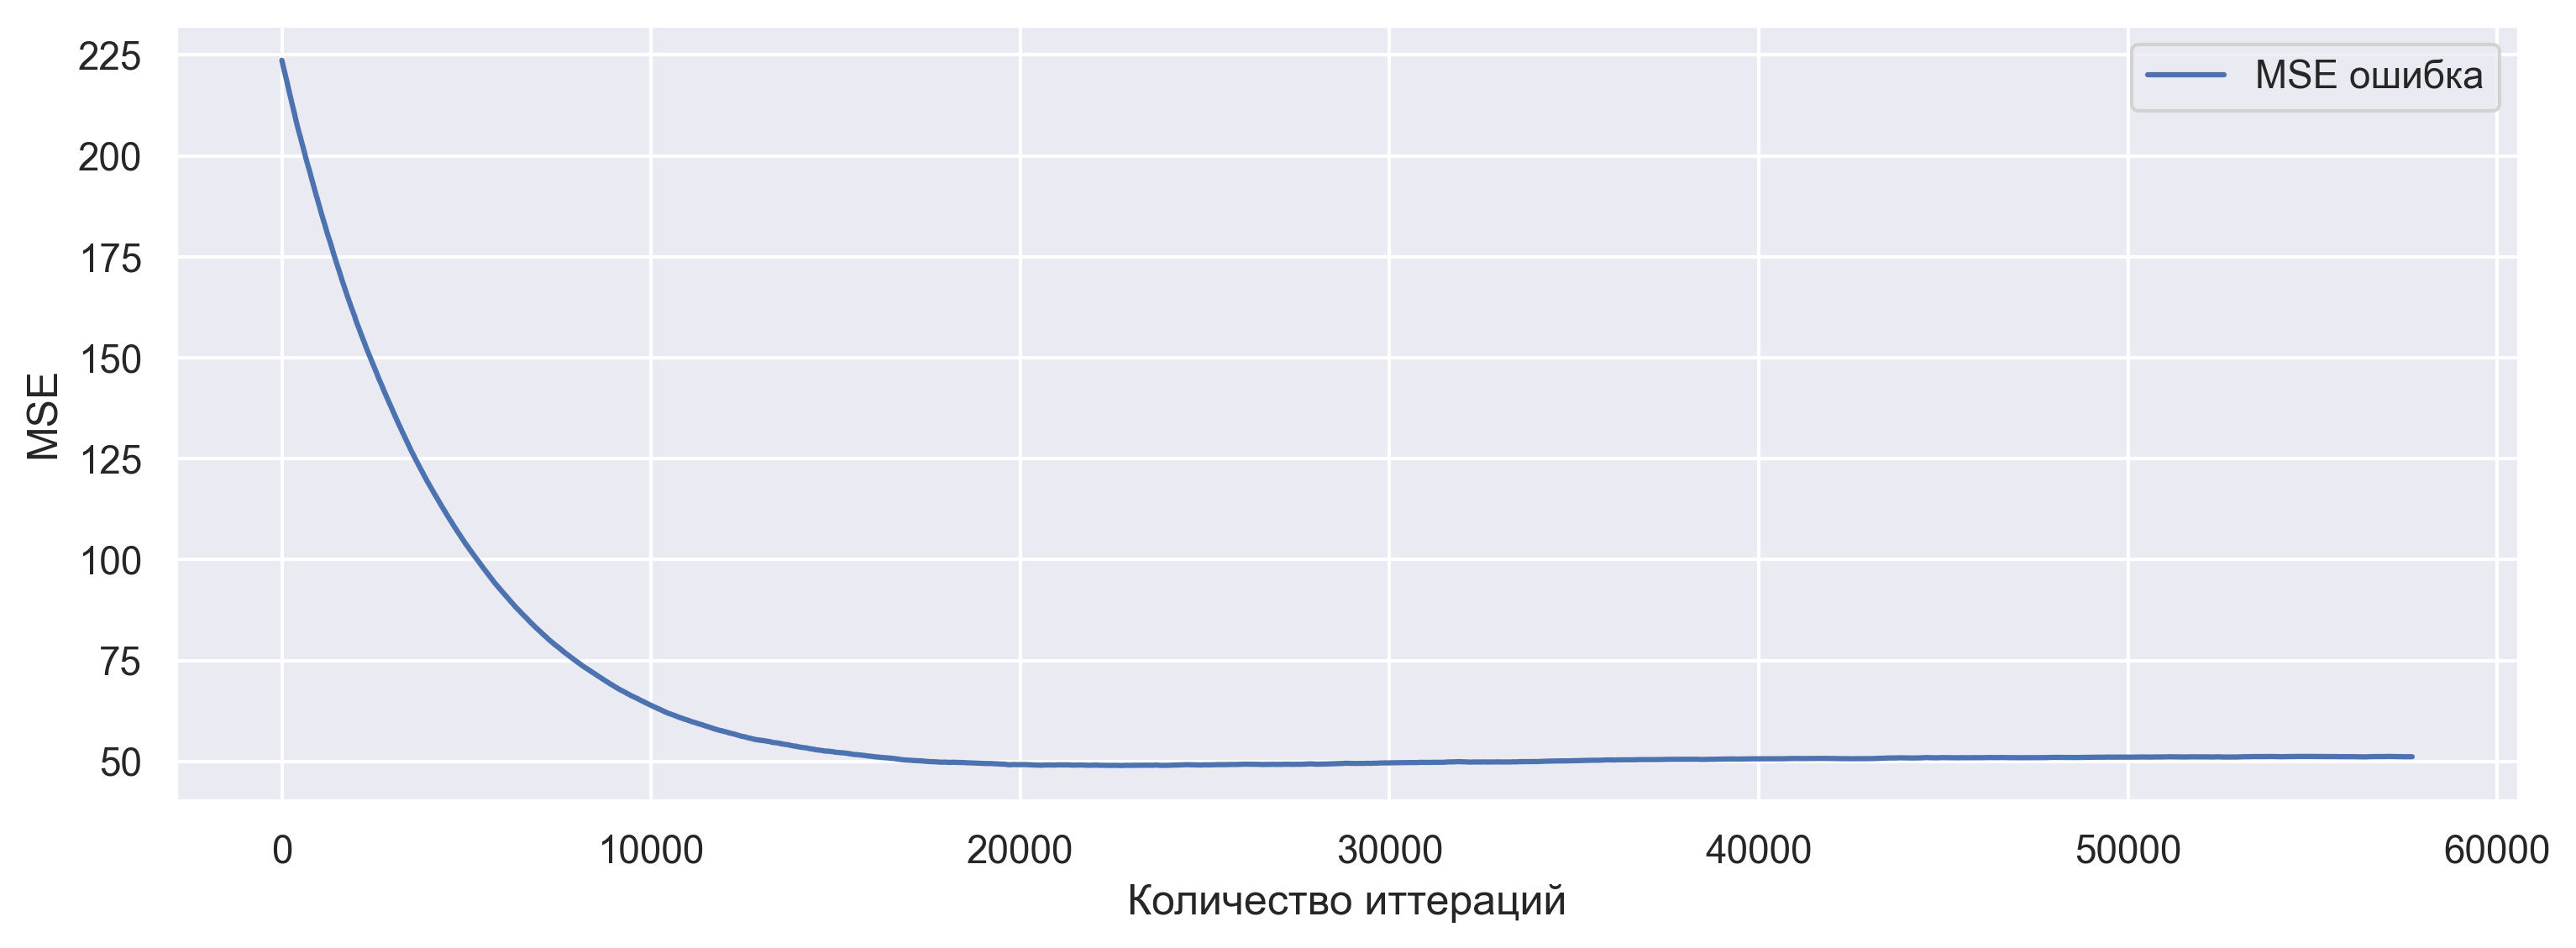

In [85]:
fig, ax = plt.subplots(figsize=(12, 4)) 
ax.plot(errors, label='MSE ошибка') 

ax.set_xlabel('Количество иттераций')
ax.set_ylabel('MSE') 
ax.legend(); 

**Выведите вектор весов, к которому сошелся метод.**

In [86]:

print(f'{Fore.LIGHTBLUE_EX}Вектор весов, на котором сошелся метод:{Fore.LIGHTGREEN_EX} {np.round(stoch_gradient_weights, 4)}')

Вектор весов, на котором сошелся метод: [13.9767  3.9177  2.7553  0.0244]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [87]:

print(f'{Fore.LIGHTBLUE_EX}MSE на последней итерации: {Fore.LIGHTGREEN_EX}{round(errors[-1], 3)}')

MSE на последней итерации: 51.149


In [88]:
# Сравним MSE рассчитанных методов
#координатный спуск:
compare_grad = lin_pred(X, gradient_weights)

# стохастический градиентный спуск:
compare_stoch_grad = lin_pred(X, stoch_gradient_weights)


print(f'{Fore.LIGHTBLUE_EX}MSE для прогноза методом координатного спуска: {Fore.LIGHTGREEN_EX} {(a:=round(mse_error(y, compare_grad), 3))}')
print(f'{Fore.LIGHTBLUE_EX}MSE для прогноза методом стохастического градиентного спуска: {Fore.LIGHTGREEN_EX}{(b:=round(mse_error(y, compare_stoch_grad), 3))}')
print(f'{Fore.LIGHTBLUE_EX}Стохастический градиентных спуск выдал результат точнее, чем координатный спуск в : {Fore.LIGHTRED_EX} {a // b} раз')


MSE для прогноза методом координатного спуска:  19081.426
MSE для прогноза методом стохастического градиентного спуска: 51.149
Стохастический градиентных спуск выдал результат точнее, чем координатный спуск в :  373.0 раз


----

## Выводы
1. Нет смысла, реализовывать самим алгоритм координатного спуска. Все реализовано в библиотеке sklearn, метод LinearRegression
2. Стохастический градиентный спуск в разы лучше расчитывает веса для предсказательной модели, чем координатный спуск. 
3. В данной задаче при одном и том же количестве иттераций, координатный спус выполнился в 2 раза быстрее, что "ничего", по сравнению с точностью предсказания, которая у последнего в 373 раза

